# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1028]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [1029]:
"""Customize visualization."""
plt.style.use("bmh")                    # Use bmh's style for plotting
sns.set_style({"axes.grid":False})      # Remove gridlines

"""Display markdown formatted output like bold, italic bold etc."""
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

In [1030]:
# Read the healthcare dataset file 

df = pd.read_csv("ExtraaLearn.csv") 


In [1031]:
bold("Preview of first five rows of the Data:")
display(df.head())

**Preview of first five rows of the Data:**

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [1032]:
bold("Preview of last five rows of the Data:")
display(df.tail())

**Preview of last five rows of the Data:**

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [1033]:
# Copying data to another variable to avoid any changes to original data 

data = df.copy() 

## Data Overview

- Observations
- Sanity checks

In [1034]:
"""Information about  our data """

bold("Information about  our Data:")
display(data.info())

"""Shape of the data"""
bold("Shape of the data:")
display(data.shape)

"""Variable datatypes"""
bold("Data Types of the Variables:")
display(data.dtypes) 

"""Variables in the combined the dataset"""
bold("Name of the Variables in  data:")
display(data.columns)

"""# Unique values in each column"""
bold("Unique values in each column:")
display(df.nunique())

**Information about  our Data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

None

**Shape of the data:**

(4612, 15)

**Data Types of the Variables:**

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

**Name of the Variables in  data:**

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')

**Unique values in each column:**

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observation:** 

  - The variables age, website_visits, time_spent_on_website and page_views_per_visit are of numeric data type and the rest of the columns are of object data type.
  - Note that, although the variable **status** is flagged here as a numerical variable, **it is actually a categorical variable.**
  - The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
  - **The dataset has 4612 rows and 15 columns**.
  - **The column ID is an identifier for students in the data** and is unique for each employee. This column will not bring any value to our analysis, so we can drop it.
  - On the basis of the number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

In [1035]:
# Checking for duplicate values in the data
display(df.duplicated().sum())

0

**Observation:** **The dataset has no duplicates.**

In [1036]:
# To view studentid and the number of times they showed interest to these online education offerings
display(df['ID'].value_counts())


EXT2384    1
EXT1665    1
EXT3943    1
EXT2755    1
EXT1148    1
          ..
EXT2241    1
EXT2252    1
EXT920     1
EXT3161    1
EXT3360    1
Name: ID, Length: 4612, dtype: int64

**Observation:** The maximum number of times the same student in our dataset showed interest in these program offerings is once.

**Let's drop the column ID** as mentioned above and define lists for numerical and categorical columns to explore them separately.

In [1037]:
# Dropping ID from the data as it is an identifier and will not add value to the analysis
df=df.drop(columns=["ID"])


In [1038]:
display(df.select_dtypes(include='object').columns)

Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')

In [1039]:
display(df.select_dtypes(include='number').columns)

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')

In [1040]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit']

# Creating categorical variables 
cat_cols= ['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate analysis for numerical variables**

In [1041]:
bold("Descriptive statistics of the numerical columns")
display(df.describe().T)

**Descriptive statistics of the numerical columns**

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
 - **On average, Leads viewed the page about 3 times during each visit.**
 - **The leads visited the online education website at most 30 times.**
 - **The maximum number of times the online education website was viewed at each visit is over 18.**
 - **The lead's time spent on the website goes up to 2537 seconds.** There might be outliers in this variable. **The median time spent on the website is 376 seconds with an average of 724 seconds.**
 - Again, although the variable **status** is flagged here as a numerical variable, **it is actually a categorical variable.**

**Let's explore these variables in some more depth by observing their distributions**

In [1042]:
# Function to plot a boxplot and a histogram along the same scale 

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None): 

    """ 

    Boxplot and histogram combined 

 

    data: dataframe 

    feature: dataframe column 

    figsize: size of figure (default (12,7)) 

    kde: whether to the show density curve (default False) 

    bins: number of bins for histogram (default None) 

    """ 

    f2, (ax_box2, ax_hist2) = plt.subplots( 

        nrows = 2,      # Number of rows of the subplot grid = 2 

        sharex = True,  # x-axis will be shared among all subplots 

        gridspec_kw = {"height_ratios": (0.25, 0.75)}, 

        figsize = figsize, 

    )                   # Creating the 2 subplots 

    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet" 

    )                   # Boxplot will be created and a star will indicate the mean value of the column 

    sns.histplot( 

        data = df, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter" 

    ) if bins else sns.histplot( 

        data = df, x = feature, kde = kde, ax = ax_hist2 

    )                   # For histogram 

    ax_hist2.axvline( 

        df[feature].mean(), color = "green", linestyle = "--" 

    )                   # Add mean to the histogram 

    ax_hist2.axvline( 

        df[feature].median(), color = "black", linestyle = "-" 

    )                   # Add median to the histogram 

 

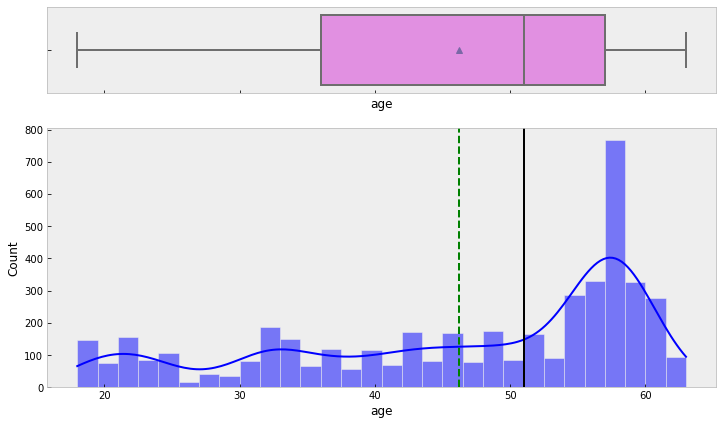

In [1043]:
histogram_boxplot(df, "age", kde = True, bins = 30) 

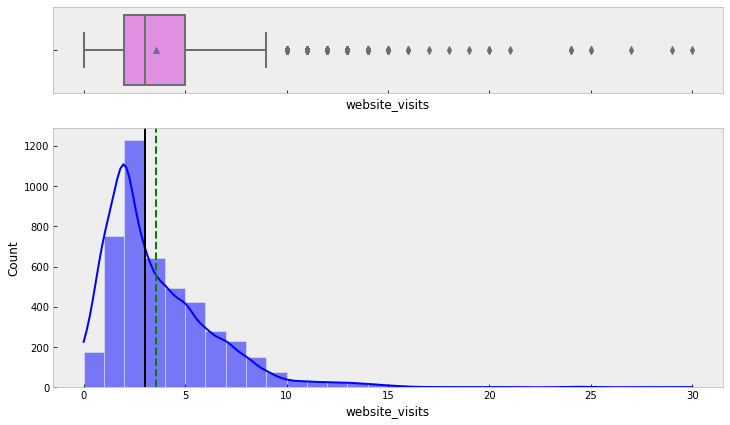

In [1044]:
histogram_boxplot(df, "website_visits", kde = True, bins = 30) 

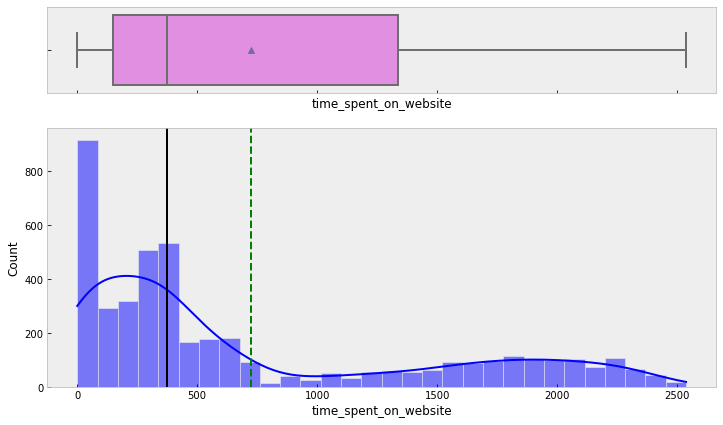

In [1045]:
histogram_boxplot(df, "time_spent_on_website", kde = True, bins = 30) 

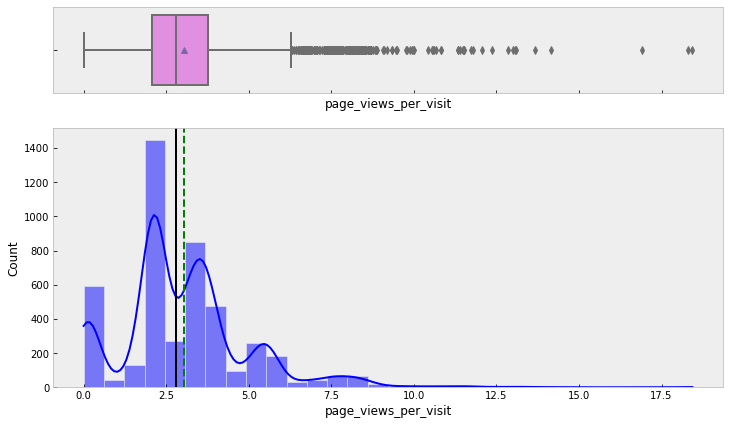

In [1046]:
histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 30) 

**Observations:**

- **The age distribution is close to a uniform distribution until around 54 years old** Then it drastically increases for older leads with the majority of leads being between the ages of 55 and 60.

- **The number of websites visits is skewed to the right**, implying that most leads tend to believe they got  enough information within a few visits. In fact the number of times the website is the most visited is 2 times only. Moreover, all leads except for the few outliers visited the websites less than 10 times.

- **The time_spent_on_website is somehow skewed to the right** implying that most leads tend to believe they got enough information within a few seconds. **The majority of these leads spent less than 400 seconds on the websites.** 

- **the number of page_views_per_visit also has a right skewed distribution**, meaning most leads do not view many pages. In fact **the number pages that are the most viewed by leads at each visit is around 2.** **Moreover, all leads except for the outliers viewed at most 6 pages.**


### **Univariate analysis for categorical variables**

In [1047]:
bold("Categories of each categorical Variables")
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

**Categories of each categorical Variables**

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

**Observations:**

- **Around 88% of the leads are not students, and over 50% are professionals.** This appears to be consistent with the fact that non students are mostly the one looking for online education, due to being at work during regular business hours.
- **Leads are nearly using the Mobile App and the Website at the same rate for their first_interaction with ExtraaLearn.**
- **Nearly 50% of the leads have their profiles at least 75% filled**, and **nearly all leads have filled more than half of their profiles.**
- **Nearly 50% of the leads are seeking details about the program through email.**
- **Only about 11% of the leads had seen the add of ExtraaLearn in the Newspaper.** This may indicate that the company should either invest more to increase visibility through the Newspaper, or reduce funds on Newspaper adds to invest them where leads are most likely to see the add. 
- **Only about 5% of the leads had seen the add of ExtraaLearn in the Magazine.** This may indicates that the company should either invest more to increase visibility through the Magazine, or eliminate funds allocated to Magazine adds and invest them where leads are most likely to see the add. 
- **Only about 11% of the leads had seen the add of ExtraaLearn on digital platforms.** This also may indicate that the company should either invest more to increase visibility through digital platforms, or eliminate funds allocated to digital platform adds and invest them where leads are most likely to see the add.
- **Only about 15% of the leads had seen the add of ExtraaLearn in educational channels.** This also may indicate that the company should either invest more to increase visibility through educational channels, or eliminate funds allocated to educational channels and invest them where leads are most likely to see the add.
- **Only about 2% of the leads had heard the about ExtraaLearn through reference.** This may indicate that the company should improve their incentive to further motivate their customers to refer students to these online education offerings.
- **The rate of leads conversion to a paid customer is about 30%.**

### **Bivariate analysis for numerical variables**


<AxesSubplot:>

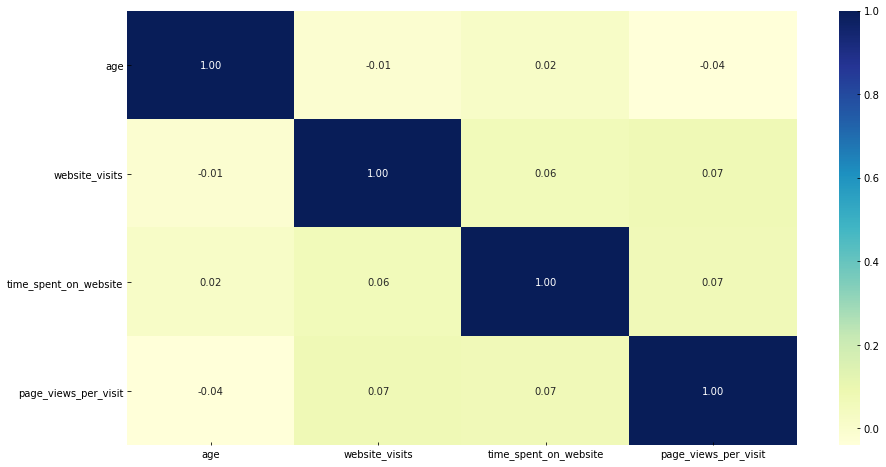

In [1048]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
display(sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu'))

**Observations:**

- **There is little to no correlation between numerical variables.**

In [1049]:
# Mean of numerical variables grouped by leads conversion to paid customer rate
display(df.groupby(['status'])[num_cols].mean().T)

status,0,1
age,45.153014,48.663762
website_visits,3.578980,3.538126
time_spent_on_website,577.420711,1068.397967
page_views_per_visit,3.025732,3.027050


**Observations:**
- **Leads converting to paid customer are just 3 years older on average than Leads not converting to paid customer.** 
- **Leads converting to paid customers visit the website on average at the same rate as Leads not converting to paid customer.** So, the number of website visits may not be a very strong indicator of the status. 
- **Leads converting to paid customers spend nearly twice as much time on the website on average than Leads not converting to paid customer.** So, Leads spending a long time on the website are more likely to become paid customers. 
- **Leads converting to paid customers view on average the same number of pages as  leads not converting to paid customer.** So, the number of page views per visit may not also be a very strong indicator of the status.

### **Bivariate analysis for independent categorical variables and Status**

 **Let's now check how the leads conversion to paid customer rate is related with other categorical variables.**

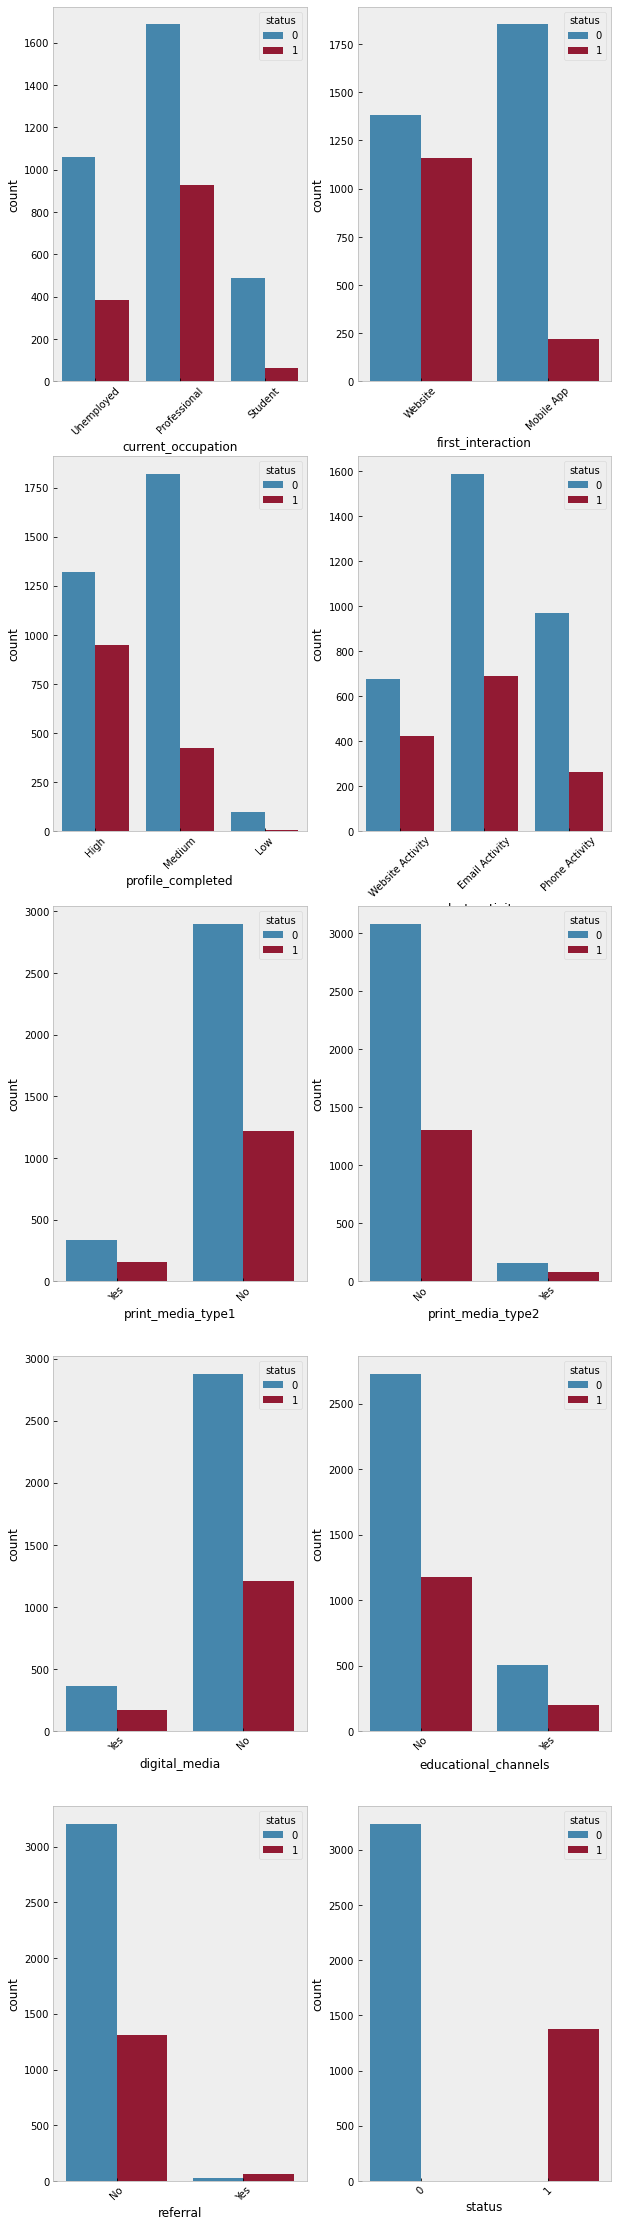

In [1050]:
plt.figure(figsize =(10,40))
for i in enumerate(cat_cols):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x=i[1], hue ='status', data=df)
    plt.xticks(rotation =45)

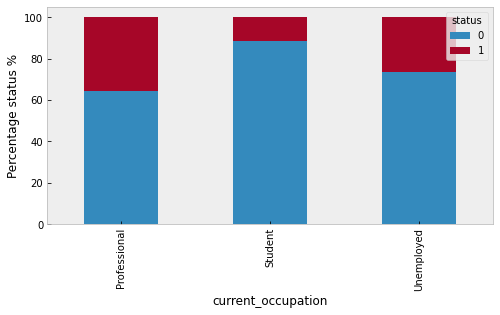

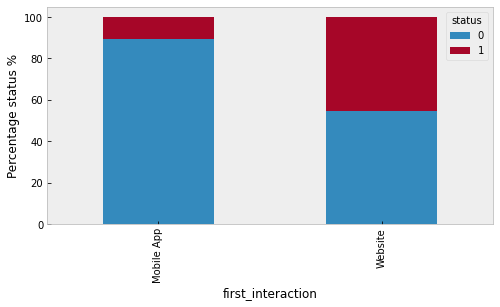

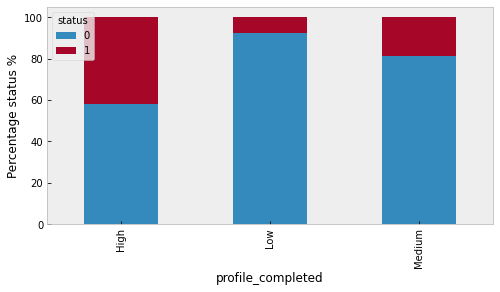

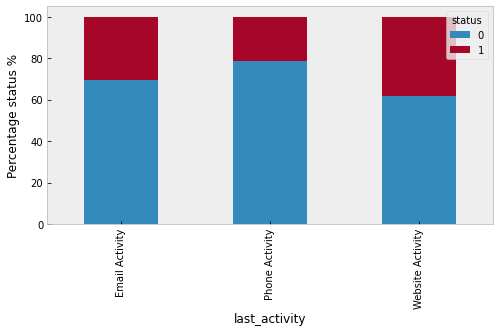

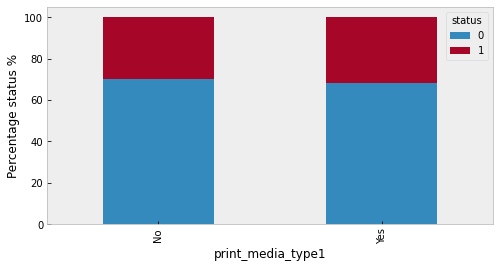

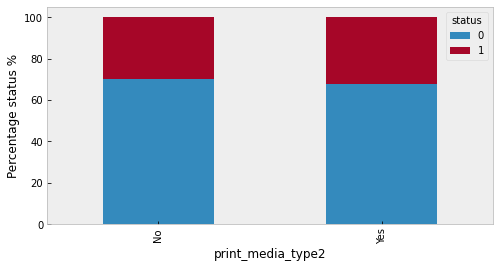

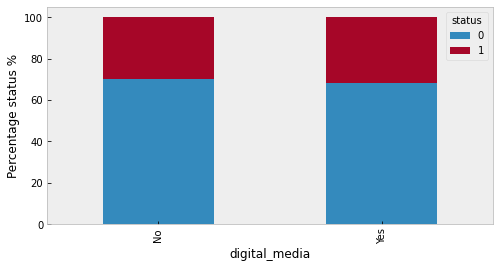

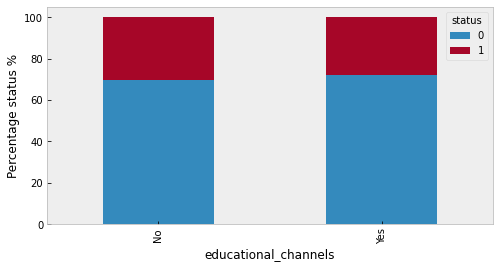

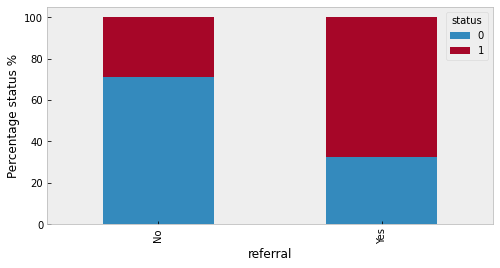

In [1051]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

**Observations:**
    
- **Students have only about 10% chance of converting to paid customer**, 
which is very low compared to about 35% chance of converting to paid customer for professional and 30% for unemployed.
-  **The chance of converting to paid customer when first interacting through the website is a lot higher than when first interacting through the mobile app.** Over 50% for the website against just about 10% for the mobile app.
- **As expected, the closer a lead is to complete their profile, more likely they are to convert to paid customers**
- **The leads who had their last interaction with ExtraaLearn through the website are more likely to convert to paid customers, followed by those with Email activity.
- **As mentioned above, the variables print_media_type1, print_media_type2, digital_media and educational_channels may not be strong predictors of the status of leads** since in each of these variables, the probabilities of converting to a paid customer is nearly the same across the categories.
-  **The chance of converting to paid customer is more than twice higher when a lead is referred than when the lead is not referred.** So the company may need to provide more incentive for referrals. 





 **Some independent variables stand out as they are stronly associated with the status of the Leads. Let's now check how these variables are related to each others.**

### **Bivariate analysis between independent variables**

In [1052]:
display(df.groupby(['first_interaction','profile_completed'])['age'].count())

first_interaction  profile_completed
Mobile App         High                 1014
                   Low                    44
                   Medium               1012
Website            High                 1250
                   Low                    63
                   Medium               1229
Name: age, dtype: int64

**Observations:**
 - **There were more high profile completed on the Website than on the mobile App.** 

In [1053]:
display(df.groupby(['first_interaction'])['time_spent_on_website'].mean())

first_interaction
Mobile App    720.123188
Website       727.177419
Name: time_spent_on_website, dtype: float64

**Observations:**

- **On average, Leads using the Website for their first interaction spent slightly more time on it than leads using the Mobile APP.**

In [1054]:
display(df.groupby(['current_occupation'])['page_views_per_visit'].mean())
display(df.groupby(['current_occupation'])['time_spent_on_website'].mean())

current_occupation
Professional    3.008392
Student         3.261034
Unemployed      2.967845
Name: page_views_per_visit, dtype: float64

current_occupation
Professional    730.792813
Student         675.655856
Unemployed      730.324080
Name: time_spent_on_website, dtype: float64

**Observations:**

- **On average, Students spent less time on the website/Mobile App but they view slightly more pages per visit than Professionals and Unemployed.**

### **Multivariate analysis between independent variables**

In [1055]:
display(df.groupby(['current_occupation','first_interaction'])['time_spent_on_website'].mean())

current_occupation  first_interaction
Professional        Mobile App           714.263644
                    Website              744.607719
Student             Mobile App           702.080169
                    Website              655.962264
Unemployed          Mobile App           737.654206
                    Website              724.434293
Name: time_spent_on_website, dtype: float64

**Observations:**

- **On average, Students and Unemployed spent more time on the website using the mobile App, compared to  Professionals instead spent more time using the Website.** 

In [1056]:
display(df.groupby(['current_occupation', 'profile_completed'])['page_views_per_visit'].mean())

current_occupation  profile_completed
Professional        High                 3.035378
                    Low                  2.837525
                    Medium               2.989510
Student             High                 3.254141
                    Low                  4.126615
                    Medium               3.225120
Unemployed          High                 2.907917
                    Low                  3.401424
                    Medium               3.007166
Name: page_views_per_visit, dtype: float64

- **On average, Students and Unemployed who viewed more pages per visit are those with the least completed profiles in their respective categories.** 

- **On average, Professionals who viewed more pages per visit are those with the most completed profiles in their category.** 

In [1057]:
display(df.groupby(['current_occupation','first_interaction'])['age'].mean())
display(df.groupby(['current_occupation','last_activity'])['age'].mean())
display(df.groupby(['current_occupation', 'profile_completed'])['age'].mean())

current_occupation  first_interaction
Professional        Mobile App           48.950462
                    Website              49.679298
Student             Mobile App           21.282700
                    Website              21.040881
Unemployed          Mobile App           50.364486
                    Website              49.959950
Name: age, dtype: float64

current_occupation  last_activity   
Professional        Email Activity      49.636923
                    Phone Activity      48.972384
                    Website Activity    49.159236
Student             Email Activity      21.259124
                    Phone Activity      20.900000
                    Website Activity    21.206612
Unemployed          Email Activity      50.271307
                    Phone Activity      50.629534
                    Website Activity    49.339031
Name: age, dtype: float64

current_occupation  profile_completed
Professional        High                 49.532447
                    Low                  45.672131
                    Medium               49.337774
Student             High                 21.053004
                    Low                  21.692308
                    Medium               21.216216
Unemployed          High                 50.555556
                    Low                  49.515152
                    Medium               49.756374
Name: age, dtype: float64

**Observations:**

- **On average, Students are about 21 years old and Professionals and Unemployed are about 50 years old.

- **On average, Students (respectively Unemployed) who first interacted with ExtraaLearn through the Mobile App are just slightly older than Students (respectively Unemployed) who first interacted through the website.

- **On average, Professionals who first interacted with ExtraaLearn through the Mobile App are jsut slightly younger than those through the website.

- **Older Professional use used Emails for their last activity, while younger students used phone activity and younger Unemployed used Website activity.**

- **Older Professional and  older students completed at least 75% of their profile.**

**Now we have explored our data. Let's build the model**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [1058]:
df.isnull().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observations:**
**The dataset has no missing values.**

#### Outlier detection and treatment

As seen above, the variables **website_visits** and **page_views_per_visit** have outliers and are both skewed to the right. In both cases, the median is closed to the  mean. Let's drop the outliers.

In [1059]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered

In [1060]:
df['website_visits'] = removeOutliers(df['website_visits'])

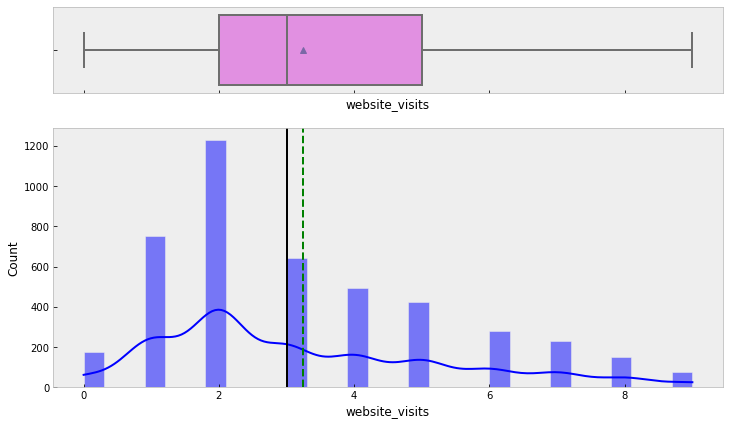

In [1061]:
histogram_boxplot(df, "website_visits", kde = True, bins = 30) 

In [1062]:
df['page_views_per_visit'] = removeOutliers(df['page_views_per_visit'])

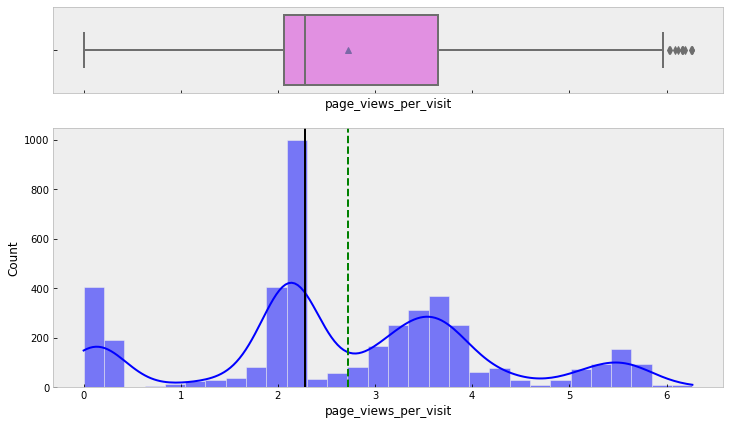

In [1063]:
histogram_boxplot(df, "page_views_per_visit", kde = True, bins = 30) 

In [1064]:
df = df.dropna()

#### **Encoding Categorical Variables**

**Creating dummy variables for categorical Variables**

In [1065]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'profile_completed','last_activity']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping other variables
dict_first_interaction = {'Website': 1, 'Mobile App':0}
dict_print_media_type1 = {'Yes': 1, 'No': 0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}
df['first_interaction'] = df.first_interaction.map(dict_first_interaction)
df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)

In [1066]:
df.head()

,age,first_interaction,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,1,7.0,1639,1.861,1,0,1,0,0,1,0,1,0,0,0,1
1,56,0,2.0,83,0.320,0,0,0,1,0,0,0,0,0,1,0,1
2,52,1,3.0,330,0.074,0,0,1,0,0,0,0,0,0,1,0,1
3,53,1,4.0,464,2.057,0,0,0,0,0,1,0,1,0,0,0,1
4,23,1,4.0,600,5.682,0,0,0,0,0,0,1,0,0,0,0,0


**Separating the independent variables (X) and the dependent variable (Y)**

In [1067]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

## EDA

- It is a good idea to explore the data once again after manipulating it. At this point all variables are numerical variables. 

<AxesSubplot:>

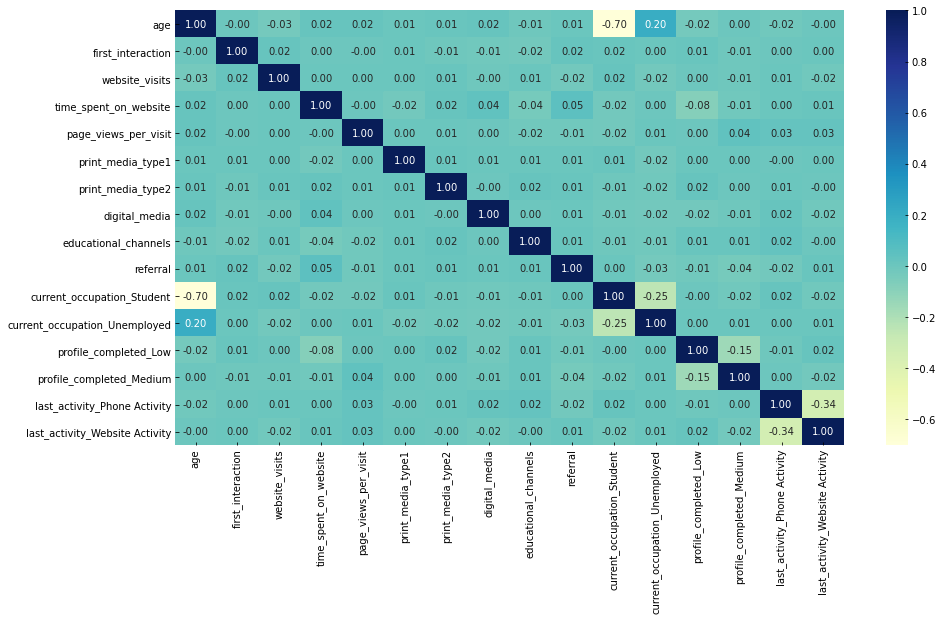

In [1068]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
display(sns.heatmap(X.corr(),annot=True, fmt='0.2f', cmap='YlGnBu'))

**Observations:**

- **The correlation detected here is between the variables **Age** and **current_occupation_student**.

In [1069]:
df.isnull().sum()

age                               0
first_interaction                 0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
print_media_type1                 0
print_media_type2                 0
digital_media                     0
educational_channels              0
referral                          0
status                            0
current_occupation_Student        0
current_occupation_Unemployed     0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Website Activity    0
dtype: int64

**NOTE:** We do not need **Feature Scaling** since we are interested in using **Decision Trees and Random Forest** and they do not require feature scaling to be performed as they are not sensitive to the variance in the data.

**Splitting the data into 70% train and 30% test set**

In this dataset, there are several times more negative samples than positive samples. We will use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [1070]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [1071]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3048, 16), (1307, 16), (3048,), (1307,))

## **Model evaluation criterion:**

#### **The model can make wrong predictions as:**
1. Predicting a lead will convert to a paid customer and the lead does not - Loss of resources
2. Predicting a lead will not convert to a paid customer and the lead does - Loss of opportunity

#### **Which case is more important?** 
* Predicting a lead will not convert to a paid customer but the lead does  i.e. losing potential funds for the company because that lead will be targeted by the marketing team when they should not be targeted.

#### **How to reduce this loss i.e need to reduce False Negatives?**
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

**To finish this section, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [1072]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model


In [1073]:
(df['status'].value_counts())*100/df.shape[0]

0    69.919633
1    30.080367
Name: status, dtype: float64

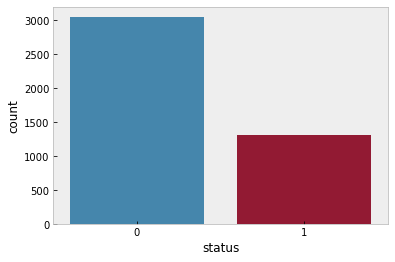

In [1074]:
sns.countplot(x = df['status'])
plt.show()

* This plot shows the distribution of both classes in the target variable is `imbalanced`.

* The frequency of class 0 (Leads not converted to paid customers) is 70% and the frequency of class 1 (Leads  converted to paid customers) is 30%, then class 0 is a dominant class and **the decision tree will maybe biased toward this dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.30, 1:0.70} to the model to specify the weight of each class and the decision tree will give more weight to class 1.

In [1075]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1) 

In [1076]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

**Let's check the model performance of the decision tree on the train data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2131
           1       1.00      1.00      1.00       917

    accuracy                           1.00      3048
   macro avg       1.00      1.00      1.00      3048
weighted avg       1.00      1.00      1.00      3048



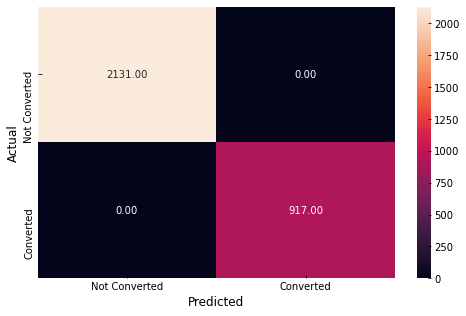

In [1077]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**
- The Model has performed perfectly on the training set.
- Now we check the performance on test data to see if the model is overfitting.

**Checking the model performance of decision tree on the test data**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       914
           1       0.64      0.64      0.64       393

    accuracy                           0.78      1307
   macro avg       0.74      0.74      0.74      1307
weighted avg       0.78      0.78      0.78      1307



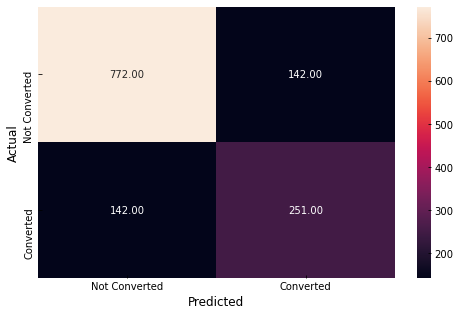

In [1078]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

###### **Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.64 in comparison to 1 for the training dataset, i.e., **the Decision Tree is overfitting the training data.**
- The precision on the test data suggests that there's a 36% (1-64) chance that the model will predict that a lead will convert to a paid customer even though he/she will not, and **ExtraaLearn may waste additional resources trying get them converted to paid customer.**

**Let's plot the feature importance and check the most important features.**

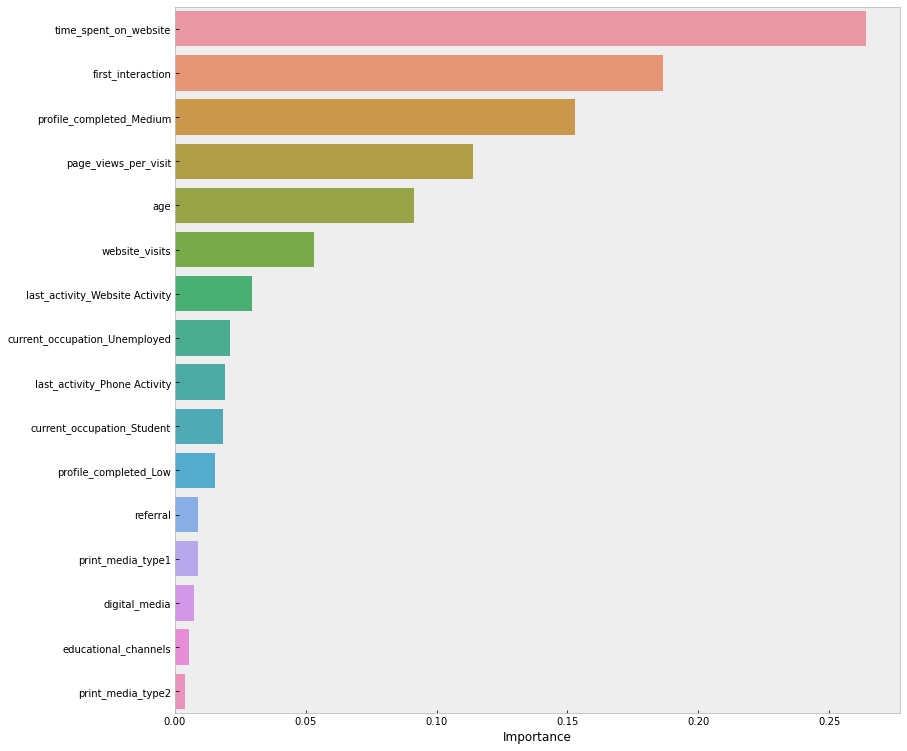

In [1124]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)
plt.show()

**Observations:**

- According to the Decision Tree, **time_spent_on_website is the most important feature, followed by first_interaction, page_views_per_visit and age.** 
- This may signify that leads who are more likely to convert to paid customers are of a certain age, first interact with ExtraaLearn through the website, spend more time on the website and are unemployed.



**Let's plot the tree** and check:

Note that the decision tree grows until the nodes are homogeneous, i.e., it has only one class. Now since the dataset here has a lot of features, the whole tree will be hard to visualize. Therefore, we are only visualizing the tree up to **max_depth = 4**.

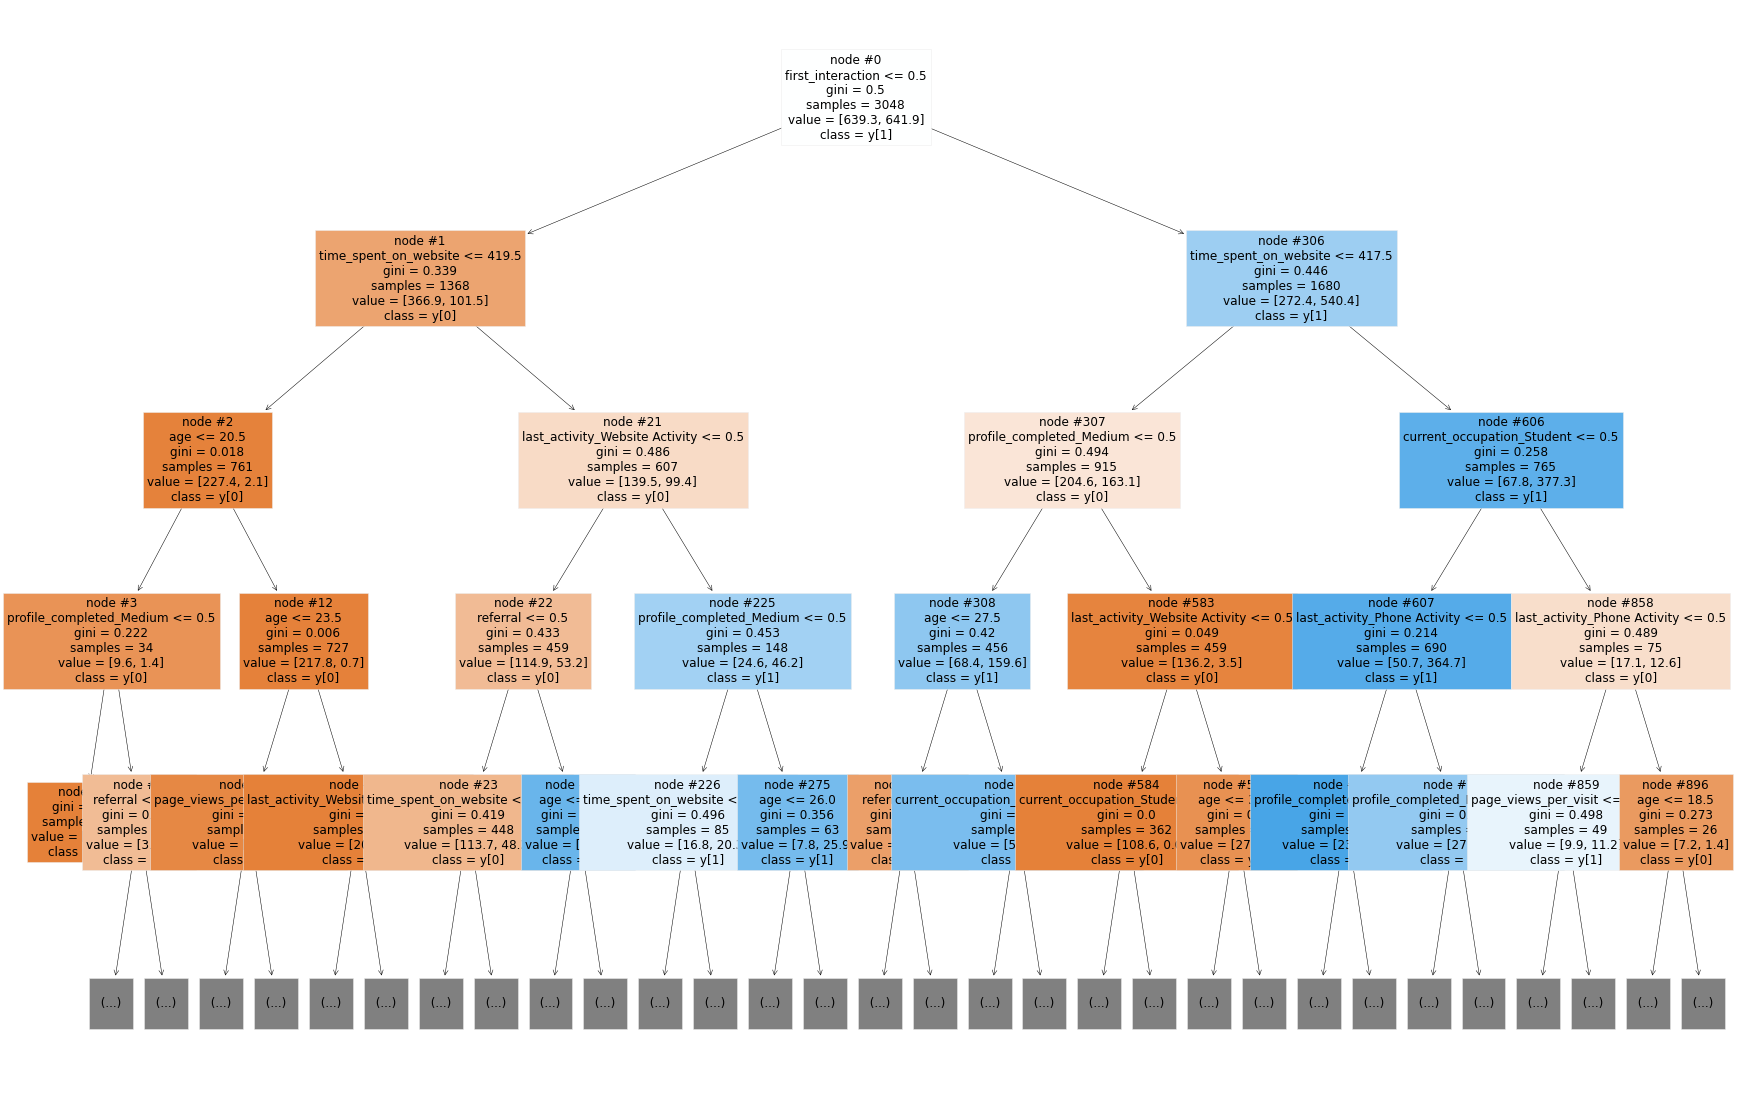

In [1080]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the leads that will convert to paid customers, i.e., **y[1]** and the orange leaves represent the leads that will not convert to paid customers, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

## **Hyperparameter Tuning**

**We will have to tune the decision tree to reduce the overfitting.** We will use  GridSearch CV to perform hyperparameter tuning on our decision tree model. 

In [1081]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=11,
                       max_leaf_nodes=50, min_samples_split=70, random_state=1)

**Checking the model performance of tuned decision tree on the training data**

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      2131
           1       0.72      0.88      0.79       917

    accuracy                           0.86      3048
   macro avg       0.83      0.87      0.84      3048
weighted avg       0.88      0.86      0.86      3048



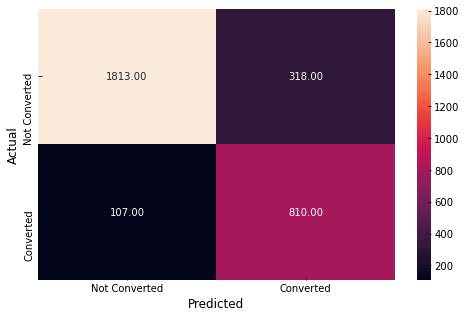

In [1082]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

**Checking the model performance of the tuned decision tree on the test data**

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       914
           1       0.68      0.83      0.75       393

    accuracy                           0.83      1307
   macro avg       0.80      0.83      0.81      1307
weighted avg       0.85      0.83      0.83      1307



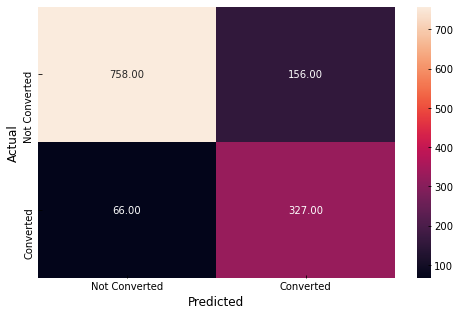

In [1083]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observation :**

* The Decision tree model with default parameters was overfitting the training data.
* **Tuning the Decision tree model has improved the performance on test data**, but not significantly. Also, the  overfitting on training data has reduced significantly, but has not completely been resolved. 

**Let's plot the feature importance and check the most important features.**

<AxesSubplot:xlabel='Importance'>

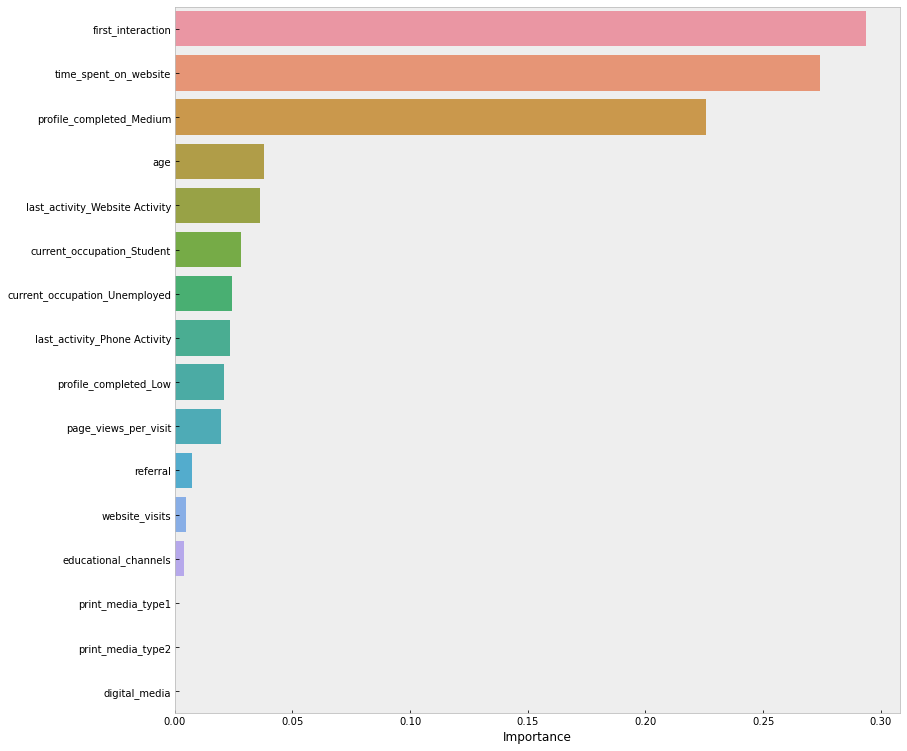

In [1084]:
# Plot the feature importance

importances = estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

-  The feature importances have slightly changed. According to the tuned model, the most important features are the **first_interaction**, followed by the **time_spent_on_website**, then the **profile_completed_Medium** and the **age**.


#### **Visualizing the Decision Tree**

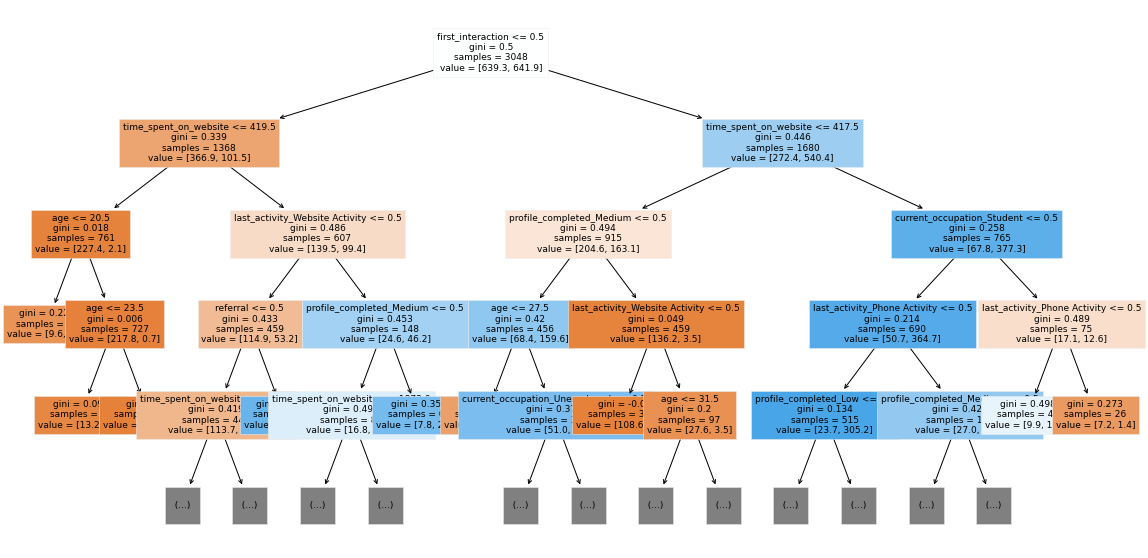

In [1085]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Do we need to prune the tree?

**We tried to tune the decision tree to reduce the overfitting but were not really successful. Now we will try to prune the tree.**

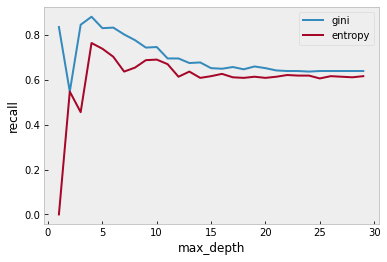

In [1086]:
# we'll iterate over 30 max_depths to see which gives the best result
# we'll try out different criterion as well (gini is computationally faster with respect to entropy)
# we'll plot max depth vs accuracy
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i,class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_gini.append(recall_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
plt.show()

**Observation:**

**It looks like gini works better for short and even loger trees.** **We can see the drop in recall accuracy as we take max depth greater than 4 and the best recall score is obtained at max_depth=4 which is 84% with both the criteria.** Let's build the model with max_depth = 5.

In [1117]:
dt_pruned_model=DecisionTreeClassifier(criterion='gini', max_depth=4, class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
dt_pruned_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       random_state=1)

In [1118]:
dt_pruned_model_pred=dt_pruned_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2131
           1       0.64      0.91      0.75       917

    accuracy                           0.82      3048
   macro avg       0.80      0.85      0.81      3048
weighted avg       0.86      0.82      0.83      3048



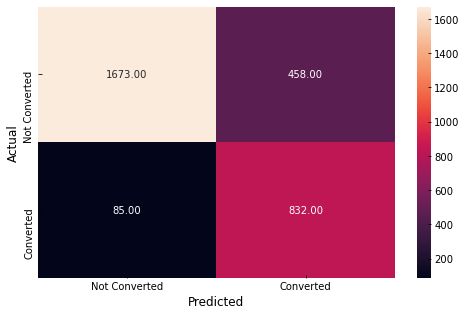

In [1119]:
# Checking performance on the training dataset
dt_pruned = dt_pruned_model.predict(X_train)
metrics_score(y_train,dt_pruned)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       914
           1       0.62      0.88      0.72       393

    accuracy                           0.80      1307
   macro avg       0.78      0.82      0.78      1307
weighted avg       0.84      0.80      0.81      1307



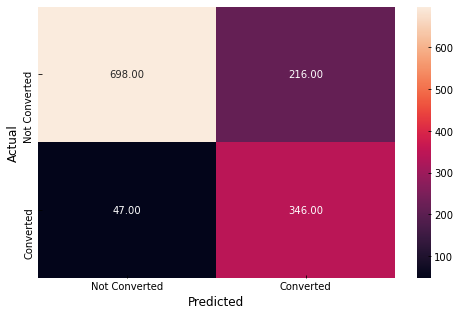

In [1120]:
# Checking performance on the training dataset
y_pred_pruned = dt_pruned_model.predict(X_test)
metrics_score(y_test,y_pred_pruned)

**Observation :**

* The tuned Decision tree model was still overfitting so it still was not able to generalize very well.* **Pruning the Decision tree model has not improved performance on test data.** Also, the  overfitting on training data  has not been reduced. In fact the pruned and tuned models have pretty much the same performance.

**Let's plot the feature importance and check the most important features.**

<AxesSubplot:xlabel='Importance'>

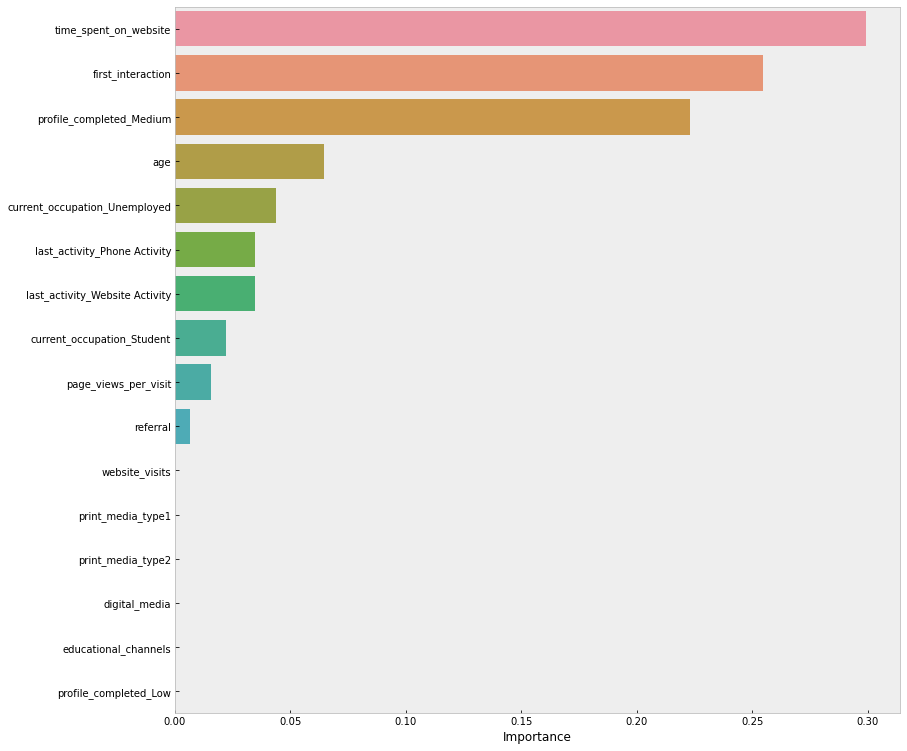

In [1091]:
# Plot the feature importance

importances = dt_pruned_model.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

- The pruned model confirms the most important features detected by the tuned model. But the feature importances have slightly changed. According to the pruned model, the most important features are the **first_interaction**, followed by the **time_spent_on_website**, then the **profile_completed_Medium**, **profile_completed_medium**,  **current_occupation_Unemployed**, **last_activity_Phone_Activity** and the **age**. 
- One can also see that the pruned model clearly shows as we predicted in the EDA that **print_media_type1**, **print_media_type2**, **digital_media** and **educational_channels** were not important in predicting the **status** of a lead.




**Visualizing the Decision Tree**

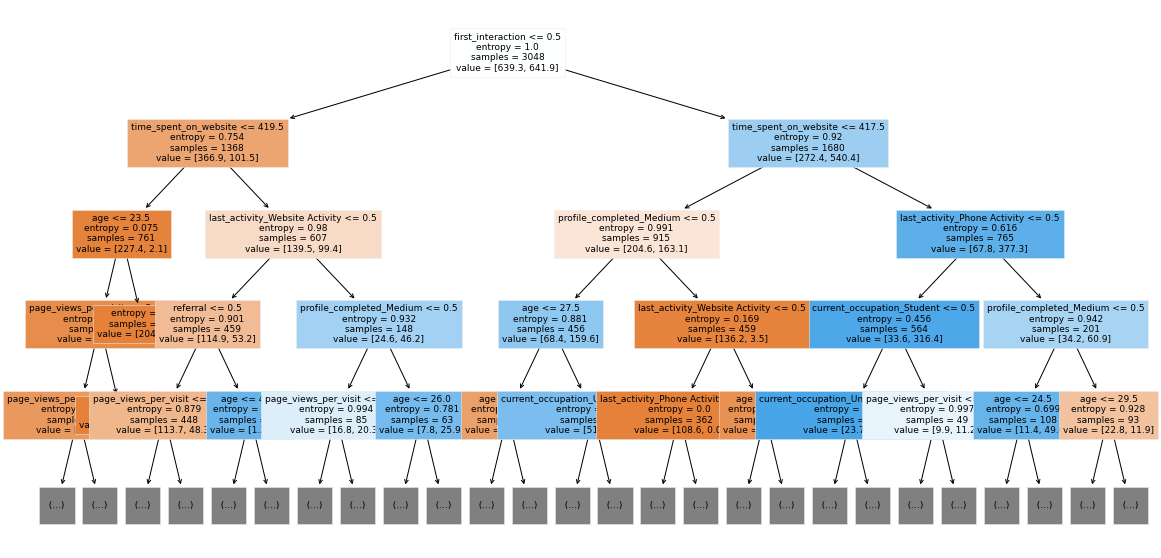

In [1092]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_pruned_model,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Building a Random Forest model

In [1121]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1, class_weight = {0: 0.30, 1: 0.70})

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

**Let's check the model performance of the Random Forest on the train data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2131
           1       1.00      1.00      1.00       917

    accuracy                           1.00      3048
   macro avg       1.00      1.00      1.00      3048
weighted avg       1.00      1.00      1.00      3048



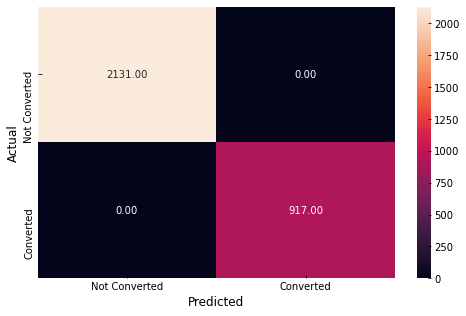

In [1122]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- The Random Forest is also giving a **100% score for all metrics on the training dataset.**
- The Model has performed perfectly on the training set.
- Now we check the performance on test data to see if the model is overfitting.

**Let's check the model performance of the Random Forest on the test data**

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       914
           1       0.77      0.65      0.71       393

    accuracy                           0.84      1307
   macro avg       0.82      0.79      0.80      1307
weighted avg       0.83      0.84      0.83      1307



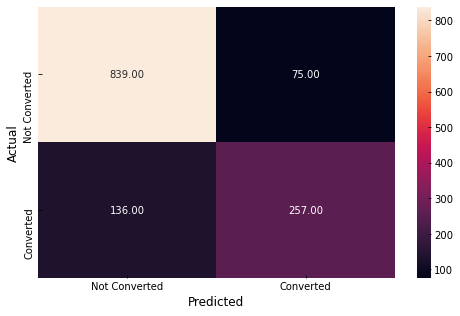

In [1095]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

###### **Observations:**

- The Random Forest works well on the training data but **not so well on the test data** as the recall is 0.65 in comparison to 1 for the training dataset, i.e., **the Random Forest is overfitting the training data.**
- The precision has improved on the test data in comparison with the decision Tree model. Here it suggests that there's a 23% (1-0.77) chance that the model will predict that a lead will convert to a paid customer even though he/she will not.

**Let's check the feature importance of the Random Forest**

<AxesSubplot:xlabel='Importance'>

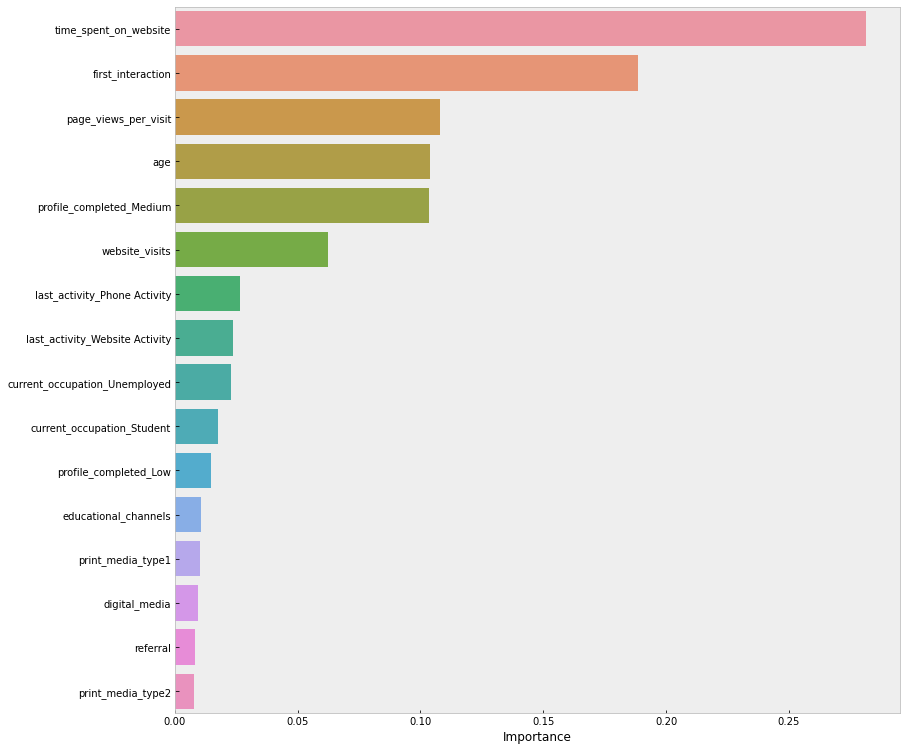

In [1096]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- According to the Random Forest model, **time_spent_on_website is the most important feature, followed by first_interaction, page_views_per_visit, age and profile_completed_Medium.** 
- This is similar to the result obtained above for the Decision Tree. So, leads who are more likely to convert to paid customers are of a certain age, first interact with ExtraaLearn through the website, spend more time on the website and completed more than half of their profile.
- As in the Decision Tree model, **website_visits** is also an important feature.

## Hyperparameter tuning

**We will also have to tune the Random Forest model to reduce the overfitting.** Let's use  GridSearch CV again to perform hyperparameter tuning on our Random Forest model. 

In [1097]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [1098]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features='auto',
                       min_samples_leaf=3, random_state=1)

**Let's check the model performance of the tuned Random Forest on the training data**

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2131
           1       0.86      0.94      0.89       917

    accuracy                           0.93      3048
   macro avg       0.91      0.93      0.92      3048
weighted avg       0.94      0.93      0.93      3048



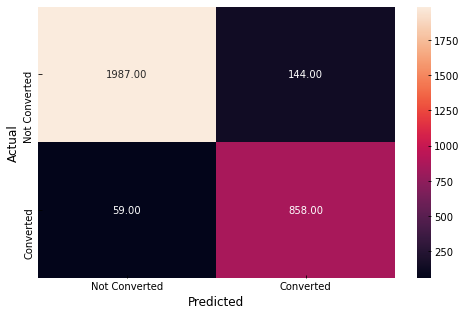

In [1099]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

**Observation :**

* The Eandom Forest model with default parameters is overfitting the training data and is not able to generalize well.
* **Tuning the model has improved performance on test data**, but not significantly. Also, the  overfitting on training data has not completely been resolved. 

**Let's check the model performance of the tuned Random Forest on the test data**

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       914
           1       0.72      0.77      0.75       393

    accuracy                           0.84      1307
   macro avg       0.81      0.82      0.82      1307
weighted avg       0.85      0.84      0.84      1307



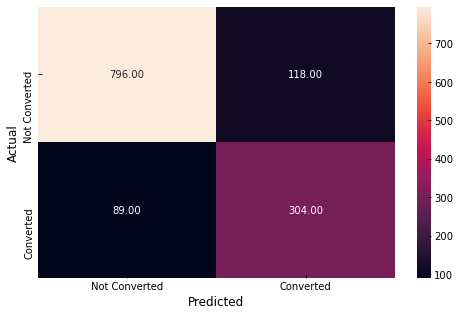

In [1100]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- **The tuned model did not improve the overall performance, but did improve the recall which is our main focus.**.  **The tuned model is also slightly overfitting the training dataset and **shows a good performance on the test dataset.**
- **The recall for class 1 (leads converting to paid customers) has improved by 12% with 5% percentage decrease in precision**. 

**Let's check the feature importance of the Random Forest**

<AxesSubplot:xlabel='Importance'>

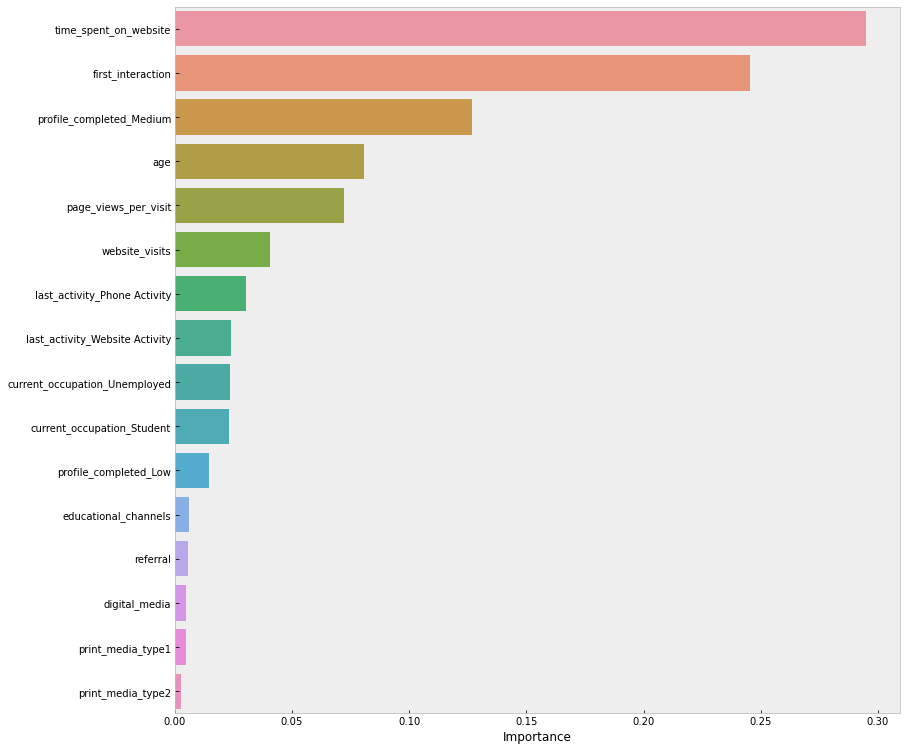

In [1101]:
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)



**Observations:**

- According to the tuned Random Forest model, **time_spent_on_website is the most important feature**, followed by **first_interaction**, **profile_completed_Medium, age and page_views_per_visit**. 






## Pruning the trees in the Random Forest

**We tried to tune the Random Forest to reduce the overfitting but were not really successful. Now we will try to prune the model by using the max_depth parameter to limit up to what depth every tree in the random forest is allow to grow.**


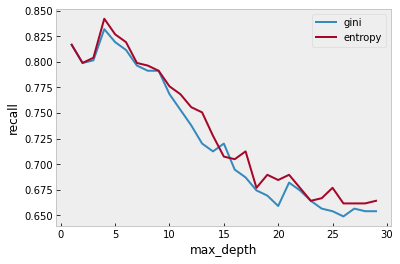

In [1102]:

# we'll iterate over 30 max_depths to see which gives the best result
# we'll try out different criterion as well (gini is computationally faster with respect to entropy)
# we'll plot max depth vs accuracy
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    rf=RandomForestClassifier(criterion='gini',max_depth=i,class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    
    acc_gini.append(recall_score(y_test,pred))
    
    rf=RandomForestClassifier(criterion='entropy',max_depth=i, class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    
    acc_entropy.append(recall_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()
plt.show()


**Observation:**

**We can see the recall starts decreasing as we take max depth greater than 5 and the best recall is obtained at max_depth=5 which is around 84% for enthopy.**


In [1103]:
rf_pruned_model=RandomForestClassifier( criterion='entropy', max_depth=5, class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
rf_pruned_model.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, random_state=1)

In [1104]:
rf_pruned_model_pred=rf_pruned_model.predict(X_test)

**Let's check the model performance of the tuned Random Forest on the train data**

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2131
           1       0.70      0.89      0.79       917

    accuracy                           0.85      3048
   macro avg       0.82      0.86      0.84      3048
weighted avg       0.87      0.85      0.86      3048



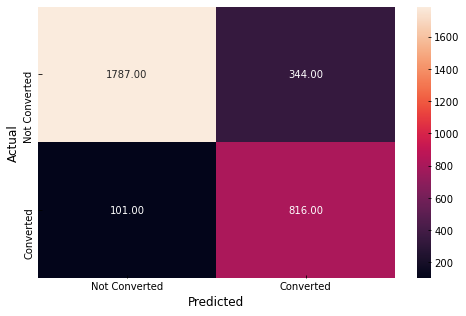

In [1105]:

# Checking performance on the training dataset
rf_pruned = rf_pruned_model.predict(X_train)
metrics_score(y_train,rf_pruned)

**Let's check the model performance of the tuned Random Forest on the test data**

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       914
           1       0.66      0.83      0.74       393

    accuracy                           0.82      1307
   macro avg       0.79      0.82      0.80      1307
weighted avg       0.84      0.82      0.83      1307



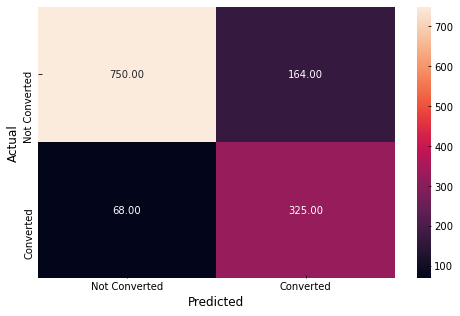

In [1106]:

# Checking performance on the training dataset
y_pred_pruned_rf = rf_pruned_model.predict(X_test)
metrics_score(y_test,y_pred_pruned_rf)



**Observation :**

* **The pruned Random Forest model also performs well on test data. Though It has not significantly reduced overfitting, but is acceptable as the maximum difference between training scores and test scores is just about 5%.**
* **Pruning the Decision tree model has fairly improved performance on test data.** 


**Let's plot the feature importance and check the most important features.**




<AxesSubplot:xlabel='Importance'>

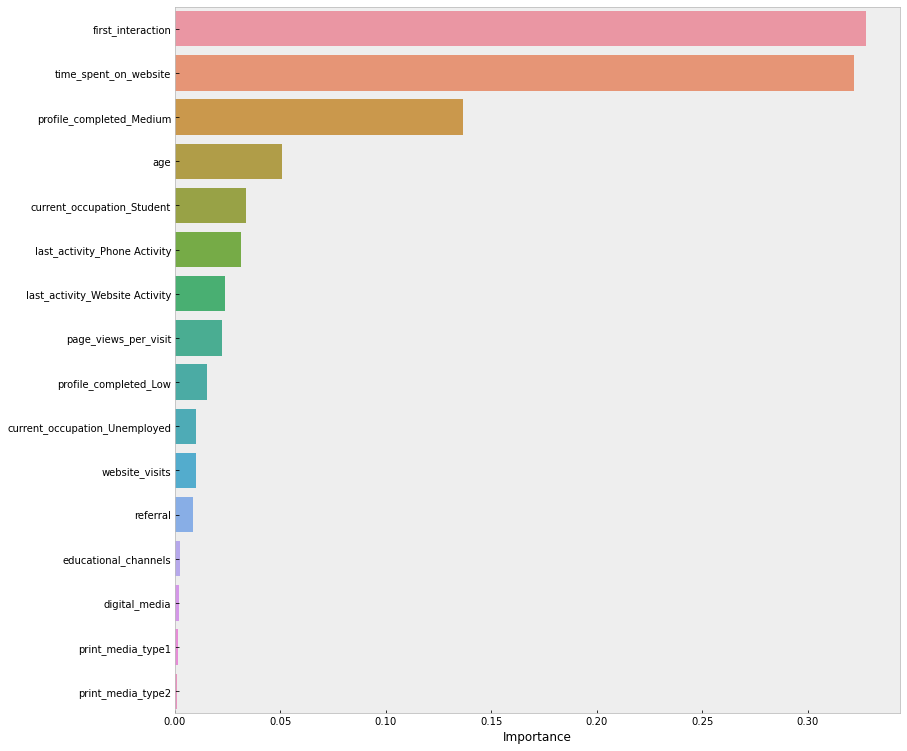

In [1107]:

importances = rf_pruned_model.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)




**Observations:**

- The pruned model confirms the most important features detected by the tuned model. But the feature importances have slightly changed in order. According to the pruned model, the most important features are the **first_interaction**, followed by the **time_spent_on_website**, then the **profile_completed_Medium**, **age**,  **current_occupation_Student**, and the **last_activity_Phone_Activity**. 
- One can also see that the pruned model clearly shows as we predicted in the EDA that **print_media_type1**, **print_media_type2**, **digital_media** and **educational_channels** were not important in predicting the **status** of a lead.




## **Model Comparison**
**Let's compare these models based on how much their recall score on the test data compare with their recall score on train data.**

In [1108]:
models = pd.DataFrame(columns=["Model","recall_score Test","recall_score Train"])

In [1109]:
dt_accuracy = round(recall_score(y_test, y_test_pred_dt) * 100)

dt_tuned_accuracy = round(recall_score(y_test,y_pred_tuned) * 100)

dt_pruned_accuracy = round(recall_score(y_test, y_pred_pruned) * 100)

rf_accuracy = round(recall_score(y_test,y_pred_test_rf) * 100)

rf_tuned_accuracy = round(recall_score(y_test,y_pred_test_rf_tuned) * 100)

rf_pruned_accuracy = round(recall_score(y_test,y_pred_pruned_rf) * 100)

dt_accuracy_train = round(recall_score(y_train,y_train_pred_dt) * 100)

dt_tuned_accuracy_train = round(recall_score(y_train, dt_tuned) * 100)

dt_pruned_accuracy_train = round(recall_score(y_train, dt_pruned) * 100)

rf_accuracy_train = round(recall_score(y_train, y_pred_train_rf) * 100)

rf_tuned_accuracy_train = round(recall_score(y_train, y_pred_train_rf_tuned) * 100)

rf_pruned_accuracy_train = round(recall_score(y_train, rf_pruned) * 100)

diff_dt = - float(dt_accuracy) + float(dt_accuracy_train)
diff_dtt = - float(dt_tuned_accuracy) + float(dt_tuned_accuracy_train)
diff_dtp = - float(dt_pruned_accuracy) + float(dt_pruned_accuracy_train)
diff_rf = - float(rf_accuracy) + float(rf_accuracy_train)
diff_rft = - float(rf_tuned_accuracy) + float(rf_tuned_accuracy_train)
diff_rfp = - float(rf_pruned_accuracy) + float(rf_pruned_accuracy_train)

In [1110]:
new_row = {"Model": "Decision Tree","recall_score Test": dt_accuracy, "recall_score Train": dt_accuracy_train, "Difference": diff_dt }
models = models.append(new_row, ignore_index=True)

In [1111]:
new_row = {"Model": "Tuned Decision Tree","recall_score Test": dt_tuned_accuracy, "recall_score Train": dt_tuned_accuracy_train, "Difference": diff_dtt}
models = models.append(new_row, ignore_index=True)

In [1112]:
new_row = {"Model": "Pruned Decision Tree","recall_score Test": dt_pruned_accuracy, "recall_score Train": dt_pruned_accuracy_train,"Difference": diff_dtp}
models = models.append(new_row, ignore_index=True)

In [1113]:
new_row = {"Model": "Random Forest","recall_score Test": rf_accuracy, "recall_score Train": rf_accuracy_train,"Difference": diff_rf}
models = models.append(new_row, ignore_index=True)

In [1114]:
new_row = {"Model": "Tuned Random Forest","recall_score Test": rf_tuned_accuracy, "recall_score Train": rf_tuned_accuracy_train, "Difference": diff_rft}
models = models.append(new_row, ignore_index=True)

In [1115]:
new_row = {"Model": "Pruned Random Forest","recall_score Test": rf_pruned_accuracy, "recall_score Train": rf_pruned_accuracy_train, "Difference": diff_rfp}
models = models.append(new_row, ignore_index=True)

In [1116]:
models.sort_values(by='Difference', ascending=True).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,recall_score Test,recall_score Train,Difference
Pruned Decision Tree,85,89,4.000000
Tuned Decision Tree,83,88,5.000000
Pruned Random Forest,83,89,6.000000
Tuned Random Forest,77,94,17.000000
Random Forest,65,100,35.000000
Decision Tree,64,100,36.000000


## **Conclusions:**

- In this project, we have tried two models (**Decision Tree** and **Random Forest**) and were **able to identify the key factors involved in leads' decision to convert to paid customers** for the company **ExtraaLearn.**
- **Tuning the two models has slightly increased their recalls by 19% for Decision Tree and by 11% for Random Forest.** 

- Clearly, Though there was a slight advantage in tuning the Decision Tree model and Tuning the Random Forest, it did not resolve the fact that the models were overfitting the data.  
- Pruning the two models fairly reduced the overfitting of the training data and yielded better models.
-  **The Pruned Decision Tree has an overall better peformance on our data set than the other models,**  since they have the a higher recall, and the gap between recall score in training and recall score for training is smaller in all cases as seen in the chart above, and thus does better in helping with the overfitting issue on the training data. 





## Actionable Insights and Recommendations

- We found out above in all models that  **the time_spent_on_website and the first_interaction are the most important features of leads converting to paid customers.** ExtraaLearn should invest resources more on designing a friendly and attractive website for leads to get their first interaction on it and spend more time on it to be retained. This will also help with the leads having a lot of **pages_per_visit** which is another important feature.
- 	We saw that **the chance of converting to paid customer is more than twice higher when a lead is referred than when the lead is not referred**. In addition, the variable referral was identified by our best 3 models as a fairly important feature in predicting status, despite the fact that only about 2% of the leads had heard about ExtraaLearn through reference. This confirms our recommendation for the company ExtraaLearn  to provide more incentive for referrals.

- One can also see that our best model clearly shows as we predicted in the EDA that **print_media_type1, print_media_type2, digital_media and educational_channels were not important in predicting the status of a lead.** This maybe partly due to leads not having enough contact with these platforms. The company should not rely too much on these channels and invest resources to the areas detected as important features. Alternatively, the company could try to improve visibility of the product through these channels. This would provide enough contact with the product and enough insight on the status of leads since the percent of leads who had seen the add of ExtraaLearn in these channels is very low.

- **last_activity is also a very important feature with Email Activity being its dominant category across the board.** The company should therefore put resources in such a way that emails are responded promptly once sent by a lead.
